In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nn_robust_attacks.l2_attack import CarliniL2
from nn_robust_attacks.setup_mnist import MNIST, MNISTModel

Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto())
K.set_session(sess)

data = MNIST()

class MNIST_Model:
    def __init__(self, session=None):
        self.num_channels = 1
        self.image_size = 28
        self.num_labels = 10

        model = Sequential()

        model.add(Conv2D(32, (3, 3),
                         input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(10))

        self.model = model

    def predict(self, data):
        return self.model(data)

In [3]:
num_epochs = 5
batch_size = 128
train_temp = 1

training = False

In [4]:
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                   logits=predicted/train_temp)

# Train first model 
modelname = "models/trained_model1"
model1 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model1.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model1.model.save(modelname)
    
else:
    model1.model = load_model(modelname, custom_objects={'fn':fn})
        
model1.model.summary()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_73 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_74 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 32)        0         
__________________________________________________________

In [5]:
# Train second model 
modelname = "models/trained_model2"
model2 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model2.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model2.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model2.model.save(modelname)
    
else:
    model2.model = load_model(modelname, custom_objects={'fn':fn})
    
model2.model.summary()

In [5]:
# Train third model 
modelname = "models/trained_model3"
model3 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model3.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model3.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model3.model.save(modelname)
    
else:
    model3.model = load_model(modelname, custom_objects={'fn':fn})
    
model3.model.summary()

In [5]:
# Train fourth model 
modelname = "models/trained_model4"
model4 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model4.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model4.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model4.model.save(modelname)
    
else:
    model4.model = load_model(modelname, custom_objects={'fn':fn})
    
model4.model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_79 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_80 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_81 (Activation)   (None, 10, 10, 64)      

In [6]:
# Performance of first model
from keras.datasets import mnist as data_keras
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = data_keras.load_data()
x_train = x_train[...,np.newaxis] /255.0
x_test = x_test[...,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

scores = model1.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

10000/10000 [==============================] - 2s 185us/step
loss=0.24138298129886387, accuracy=0.9215999841690063


In [7]:
# Performance of second model
scores = model2.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

10000/10000 [==============================] - 2s 181us/step
loss=0.13339069919716567, accuracy=0.9563000202178955


In [8]:
test_size = 250
num_img = test_size // 10
trial_data = []
indicies = []

for i in range(0, 10):
    trial_data.append([])
    indicies.append([])
    for idx, img in enumerate(data.test_data):
        if np.nonzero(data.test_labels[idx])[0][0] == i:
            trial_data[i].append(data.test_data[idx])
            indicies[i].append(idx)
        if len(trial_data[i]) >= num_img:
            break

In [9]:
import random
target_data = []

for i in range(0, 10):
    target_data.append([])
    for j in range(0, int(num_img)):
        numbers = list(range(0, i)) + list(range(i + 1, 10))
        r = random.choice(numbers)
        target_data[i].append(r)

In [10]:
target_labels = []
for i in range(0, 10):
    target_labels.append(to_categorical(target_data[i]))

In [11]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    print(pr)
    image_class = model.predict_classes(image)
    return 'Predicted {} : {:.7f}'.format(image_class[0], max(max(pr)))

In [12]:
plt.set_cmap('Greys_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
true_label = 0
inputs = np.asarray(trial_data[true_label])
targets = target_labels[true_label]

In [14]:
#targets = np.load('targets_0.csv.npy')
#inputs = np.load('inputs_0.csv.npy')

In [15]:
adv = CarliniL2(sess, model1).attack(inputs, targets)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

go up to 25
tick 0
[10000000000.0]
0 (0.016166078, 0.015158036, 0.001008042)
1000 (0.015200808, 0.015198989, 1.8192334e-06)
2000 (0.015201348, 0.01519883, 2.5186769e-06)
[10000000000.0]
0 (0.15261374, 0.15157542, 0.0010383273)
1000 (0.15177402, 0.15152232, 0.00025170116)
2000 (0.15176857, 0.15150799, 0.00026057137)
[10000000000.0]
0 (1.516791, 1.5157491, 0.0010419097)
1000 (1.4936838, 1.466644, 0.027039826)
2000 (1.4936776, 1.4665947, 0.027082967)
[10000000000.0]
0 (15.158528, 15.157486, 0.0010423145)
1000 (10.956593, 6.70719, 4.249402)
2000 (10.955317, 6.702985, 4.252332)
3000 (10.95542, 6.700581, 4.254839)
[10000000000.0]
0 (151.57588, 151.57484, 0.0010423579)
1000 (12.323809, 0.0, 12.323809)
2000 (11.524695, 0.0, 11.524695)
3000 (11.573467, 0.0, 11.573467)
[11.414523]
0 (83.36721, 83.366165, 0.0010423537)
1000 (12.221071, 0.13187897, 12.089192)
2000 (11.575165, 0.0, 11.575165)
3000 (11.5

In [16]:
from numpy import savetxt

np.save('inputs_singular_' + str(true_label) + '.csv', inputs)
np.save('adv_singular_' + str(true_label) + '.csv', adv)
np.save('targets_singular_' + str(true_label) + '.csv', targets)

Valid:


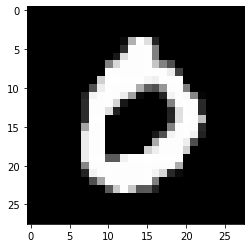

In [17]:
print("Valid:")
plt.imshow(inputs[0][:,:,0])

Adversarial:


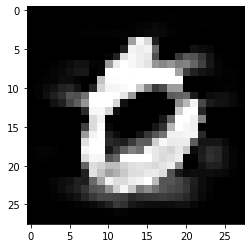

In [18]:
print("Adversarial:")
plt.imshow(adv[0][:,:,0])

Perturbation


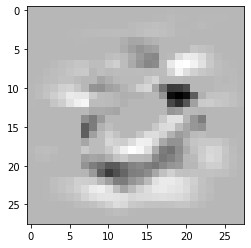

In [19]:
print('Perturbation')
plt.imshow(adv[0][:,:,0] - inputs[0][:,:,0])

In [20]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    pr = pr / np.sum(pr)
    image_class = model.predict_classes(image)
    return 'Predicted {} : {:.7f}'.format(image_class[0], max(max(pr)))

In [21]:
for i in range(0, num_img):
    print(i)
    print('Model 1', get_label_confidence(adv[i][np.newaxis, ...], model1.model))
    print('Model 2', get_label_confidence(adv[i][np.newaxis, ...], model2.model))

0

Model 1 Predicted 8 : 0.2442872
Model 2 Predicted 0 : 0.9981018
1
Model 1 Predicted 4 : 0.1773499
Model 2 Predicted 0 : 0.9984601
2
Model 1 Predicted 2 : 0.4561518
Model 2 Predicted 0 : 0.9985051
3
Model 1 Predicted 2 : 0.2795785
Model 2 Predicted 0 : 0.9966609
4
Model 1 Predicted 1 : 0.2265770
Model 2 Predicted 0 : 0.6686217
5
Model 1 Predicted 5 : 0.4821091
Model 2 Predicted 0 : 0.9988077
6
Model 1 Predicted 7 : 0.3213705
Model 2 Predicted 0 : 0.9999915
7
Model 1 Predicted 9 : 0.4993751
Model 2 Predicted 0 : 0.9999181
8
Model 1 Predicted 2 : 0.4717258
Model 2 Predicted 0 : 0.9975845
9
Model 1 Predicted 9 : 0.4739832
Model 2 Predicted 0 : 0.9968088
10
Model 1 Predicted 7 : 0.4066632
Model 2 Predicted 0 : 0.9957459
11
Model 1 Predicted 2 : 0.4987385
Model 2 Predicted 0 : 0.9805781
12
Model 1 Predicted 7 : 0.4943622
Model 2 Predicted 0 : 0.9995515
13
Model 1 Predicted 4 : 0.2547390
Model 2 Predicted 0 : 0.9988577
14
Model 1 Predicted 1 : 0.2261553
Model 2 Predicted 0 : 0.9986413
15
M

In [22]:
perturb = adv - inputs
perturb_mean =  np.sum(perturb) / num_img 
perturb_std = np.std(np.array([sum(x) for x in perturb]))
print('Mean', perturb_mean)
print('Standard Deviation', perturb_std)

Mean 5.303925170898437
Standard Deviation 0.6179049
